<a href="https://colab.research.google.com/github/Sonalpriya-pixel/data-science-portfolio/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame head:


,study_time,failures,absences,G1,G2,G3,pass
0,3,2,23,4,12,9,No
1,4,3,19,20,12,15,Yes
2,1,2,10,8,14,12,Yes
3,3,0,16,11,20,14,Yes
4,3,3,7,20,15,18,Yes



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   study_time  200 non-null    int64 
 1   failures    200 non-null    int64 
 2   absences    200 non-null    int64 
 3   G1          200 non-null    int64 
 4   G2          200 non-null    int64 
 5   G3          200 non-null    int64 
 6   pass        200 non-null    object
dtypes: int64(6), object(1)
memory usage: 11.1+ KB

Mapping 'pass' column...

Number of non-null values in 'pass' after mapping: 200
DataFrame head after mapping:


,study_time,failures,absences,G1,G2,G3,pass
0,3,2,23,4,12,9,0
1,4,3,19,20,12,15,1
2,1,2,10,8,14,12,1
3,3,0,16,11,20,14,1
4,3,3,7,20,15,18,1



Dropped 0 rows with NaN in 'pass'.

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.87      0.87      0.87        23

    accuracy                           0.90        60
   macro avg       0.89      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



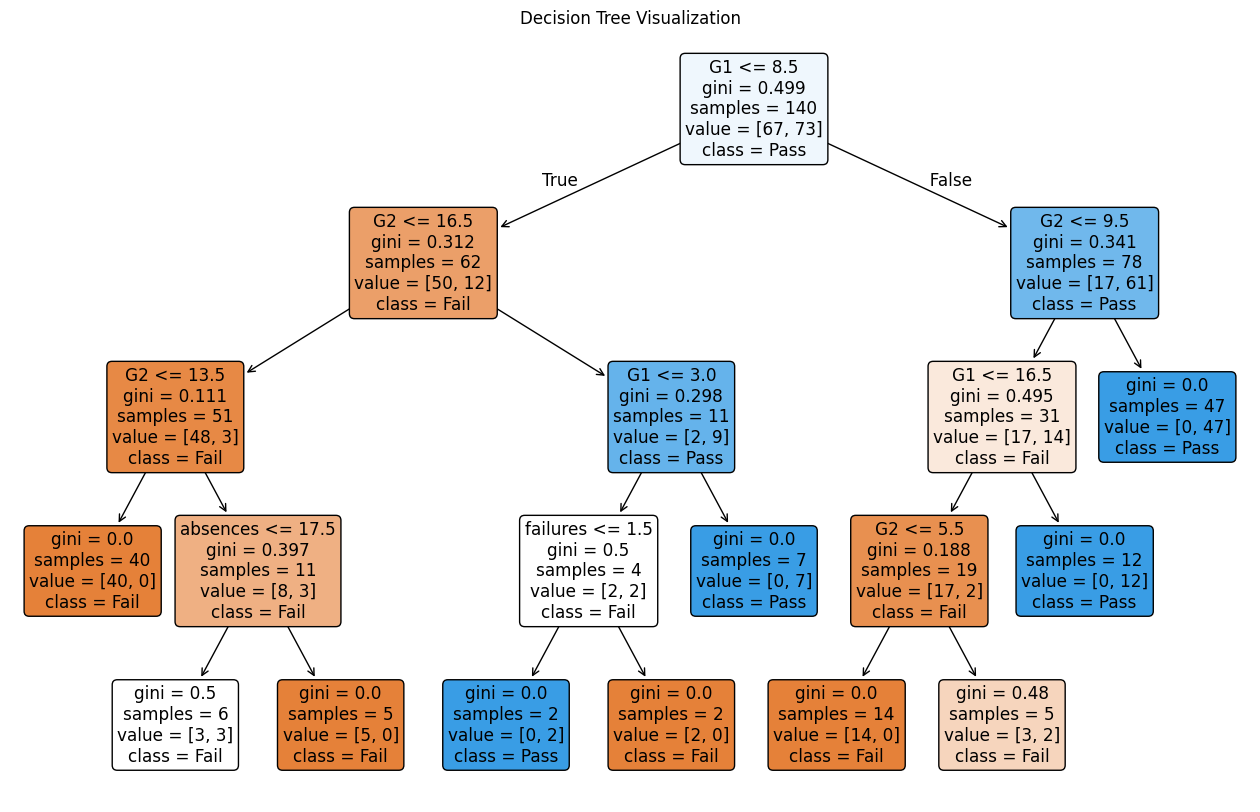

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Corrected import
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


#Load dataset
df = pd.read_csv('student_performance_large.csv')

# Display first few rows and info to check data
print("Original DataFrame head:")
display(df.head())
print("\nDataFrame info:")
df.info()


#Encode target
print("\nMapping 'pass' column...")
df['pass'] = df['pass'].map({'Yes': 1, 'No': 0}) # Corrected mapping capitalization

# Check the number of non-null values after mapping
print(f"\nNumber of non-null values in 'pass' after mapping: {df['pass'].notna().sum()}")
print("DataFrame head after mapping:")
display(df.head())


# Drop rows with NaN in the target variable
initial_rows = df.shape[0]
df.dropna(subset=['pass'], inplace=True)
rows_dropped = initial_rows - df.shape[0]
print(f"\nDropped {rows_dropped} rows with NaN in 'pass'.")

# Check if the DataFrame is empty after dropping NaNs
if df.shape[0] == 0:
    print("\nDataFrame is empty after dropping rows with NaN in 'pass'. Cannot proceed with training.")
else:
    #Feature and target
    X = df[['study_time', 'failures', 'absences', 'G1', 'G2']] # Corrected column names
    y = df['pass']

    #Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    #Train model
    model = DecisionTreeClassifier(max_depth=4, random_state=42)
    model.fit(x_train, y_train)


    #Predict
    y_pred = model.predict(x_test)


    # Evaluation
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


    #Plot the Decision Tree
    plt.figure(figsize=(16, 10))
    tree.plot_tree(model, feature_names=X.columns, class_names=['Fail', 'Pass'],
                   filled=True, rounded=True)
    plt.title("Decision Tree Visualization")
    plt.show()